## Initial look at the dataset

In [50]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#load the dataset
df = pd.read_csv(r"C:\Users\joek9\OneDrive\Desktop\Portfolio Projects\Python\imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [52]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [53]:
#summary of the dataset
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [54]:
#check for missing values
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [55]:
#check for unique values within genre

#split the genres
allGenres = df['Genre'].str.split(', ').sum()

#convert the list to a pandas series
genreSeries = pd.Series(allGenres)

#count unique genres
numUniqueGenres = genreSeries.value_counts()

numUniqueGenres

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
dtype: int64

In [56]:
#check for unique values within certificate
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

## Cleaning the Data

In [57]:
#fill in blank certificates
df['Certificate'].fillna('Not Rated', inplace=True)

#fill in blank meta scores
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

#drop rows where 'Gross' is missing
df.dropna(subset=['Gross'], inplace=True)

#convert 'Gross' to numerical form
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)

In [58]:
#convert 'Released_Year' to numerical form
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

#convert 'Runtime' into numerical form
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

# Exploratory Data Analysis (EDA)

## Highly Rated Movies Over Time

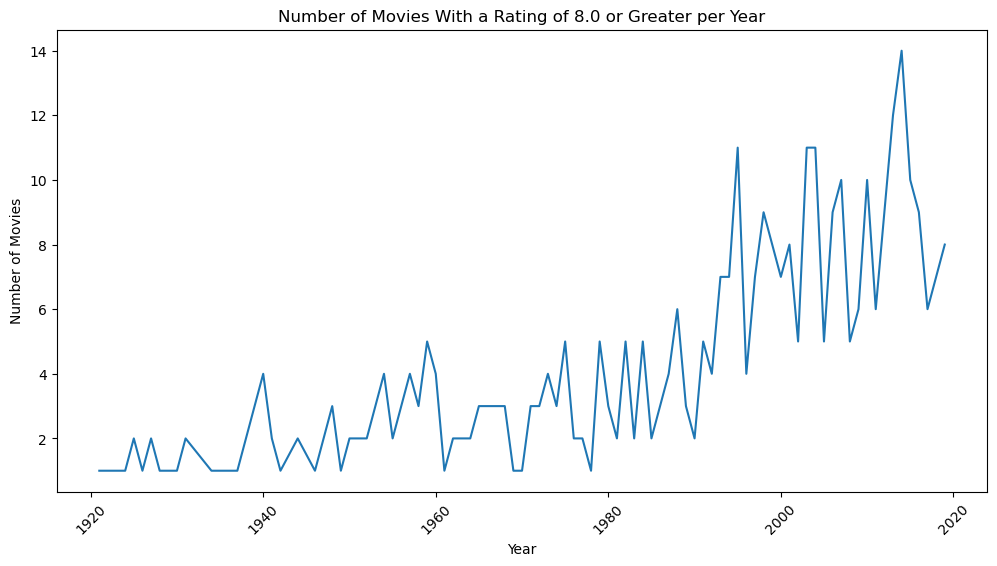

In [59]:
#create a ranking of 8.0 or greater
highRating = df[df['IMDB_Rating'] >= 8.0]

#count the movies per year
moviesPerYear = highRating['Released_Year'].value_counts().sort_index()

#plot
plt.figure(figsize=(12,6))
sns.lineplot(x=moviesPerYear.index, y=moviesPerYear.values)
plt.title('Number of Movies With a Rating of 8.0 or Greater per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Ratings Analysis

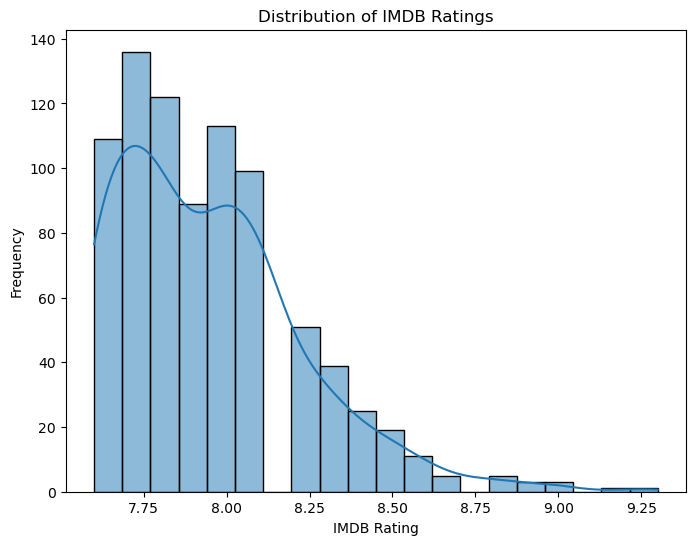

In [60]:
#find the distribution of IMDb ratings
plt.figure(figsize=(8,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

## Genre Analysis

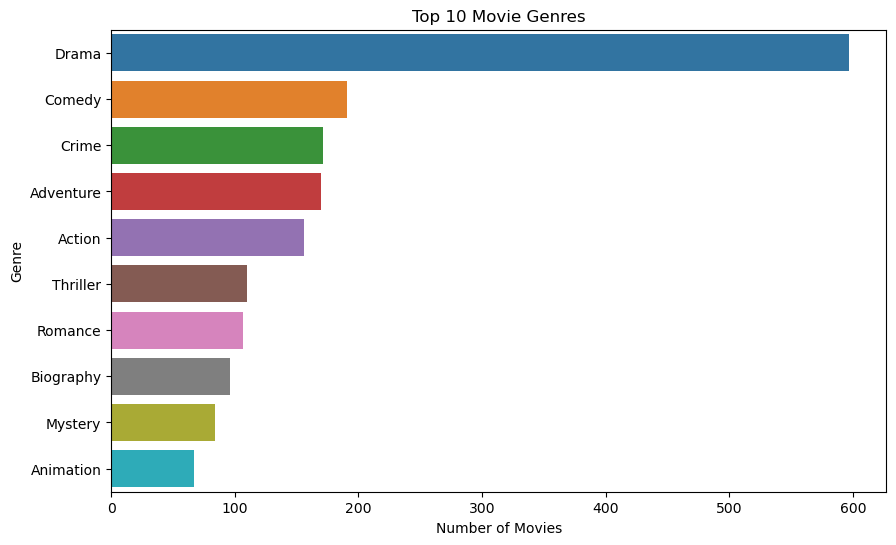

In [61]:
#split the genres
allGenres = df['Genre'].str.split(', ').sum()
genreCount = pd.Series(allGenres).value_counts()

#get only the top ten genres
topGenres = genreCount.head(10)

#plot
plt.figure(figsize=(10,6))
sns.barplot(x=topGenres.values, y=topGenres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## Gross Earnings by Rating

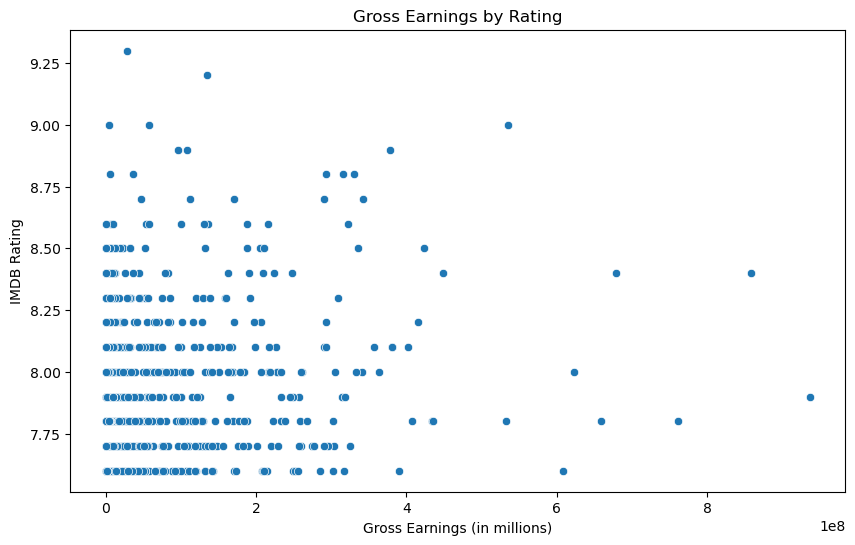

In [62]:
#Gross earnings by rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Gross', y='IMDB_Rating', data=df)
plt.title('Gross Earnings by Rating')
plt.xlabel('Gross Earnings (in millions)')
plt.ylabel('IMDB Rating')
plt.show()

## Highly Acclaimed Movies

In [63]:
'''According to IMDb, a great movie combines
both a Metacritic Critic Score of 90 or above
and a IMDb User Rating of 8.0 or above with 15,000+ votes.'''

#filter the data to the matching criteria
great_movies = df[(df['Meta_score'] >= 90) &
                 (df['IMDB_Rating'] >= 8.0) &
                 (df['No_of_Votes'] >= 15000)]

#list the top 10 movies
top_ten = great_movies.head(10)[
    ['Series_Title', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
top_ten

,Series_Title,IMDB_Rating,Meta_score,No_of_Votes,Gross
1,The Godfather,9.2,100.0,1620367,134966411.0
3,The Godfather: Part II,9.0,90.0,1129952,57300000.0
4,12 Angry Men,9.0,96.0,689845,4360000.0
5,The Lord of the Rings: The Return of the King,8.9,94.0,1642758,377845905.0
6,Pulp Fiction,8.9,94.0,1826188,107928762.0
7,Schindler's List,8.9,94.0,1213505,96898818.0
10,The Lord of the Rings: The Fellowship of the Ring,8.8,92.0,1661481,315544750.0
12,"Il buono, il brutto, il cattivo",8.8,90.0,688390,6100000.0
15,Goodfellas,8.7,90.0,1020727,46836394.0
19,Gisaengchung,8.6,96.0,552778,53367844.0


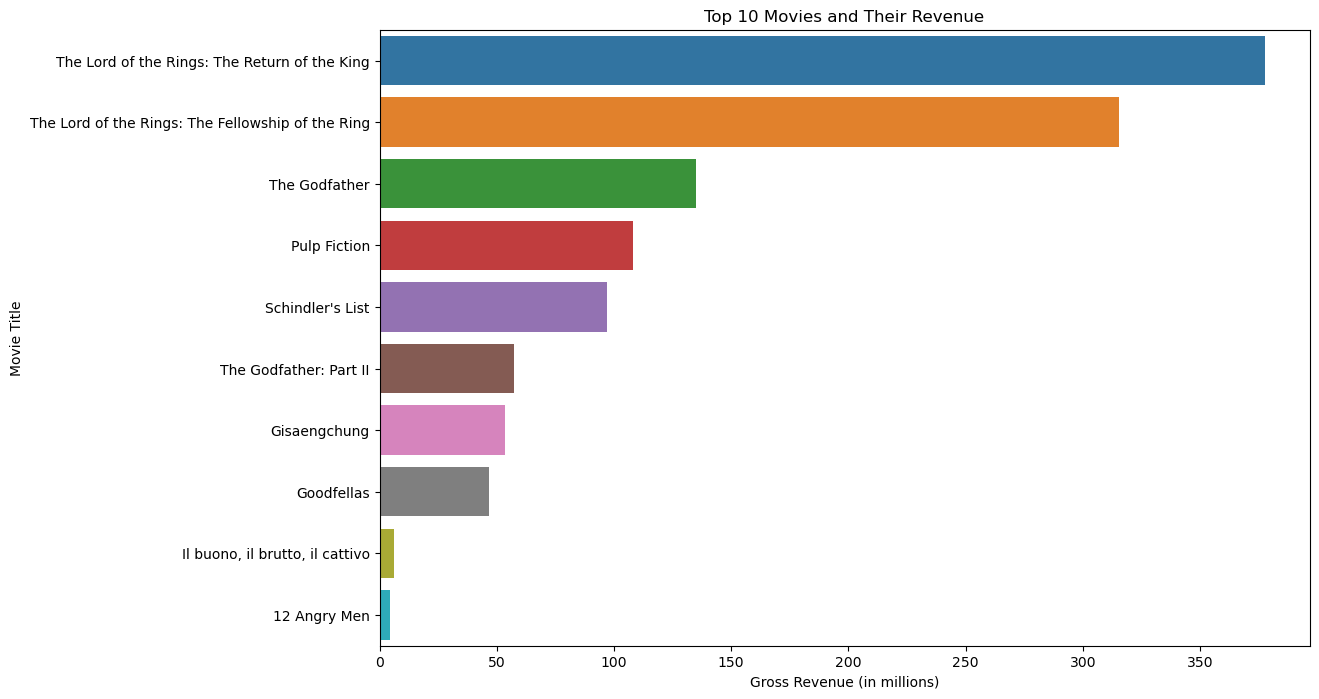

In [64]:
#visualize the revenue of the top 10 movies

#Adjust plot size
top_ten_gross['Gross_in_millions'] = top_ten_gross['Gross'] /1e6

#create the bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='Gross_in_millions', y='Series_Title', data=top_ten_gross)

#add labels
plt.title('Top 10 Movies and Their Revenue')
plt.xlabel('Gross Revenue (in millions)')
plt.ylabel('Movie Title')

#display results
plt.show()

# Answering Questions

## Do Certain Directors Consistently Receive Higher Ratings?

In [65]:
#get the average rating by director
director_rating = df.groupby('Director')['IMDB_Rating'].mean()

#get the number of movies per director
movie_count = df['Director'].value_counts()

#filter directors that have made at least 5 films
significant_directors = movie_count[movie_count >= 5].index

#sort the top directors
top_directors = director_rating[director_rating.index.isin(significant_directors)].sort_values(ascending=False)


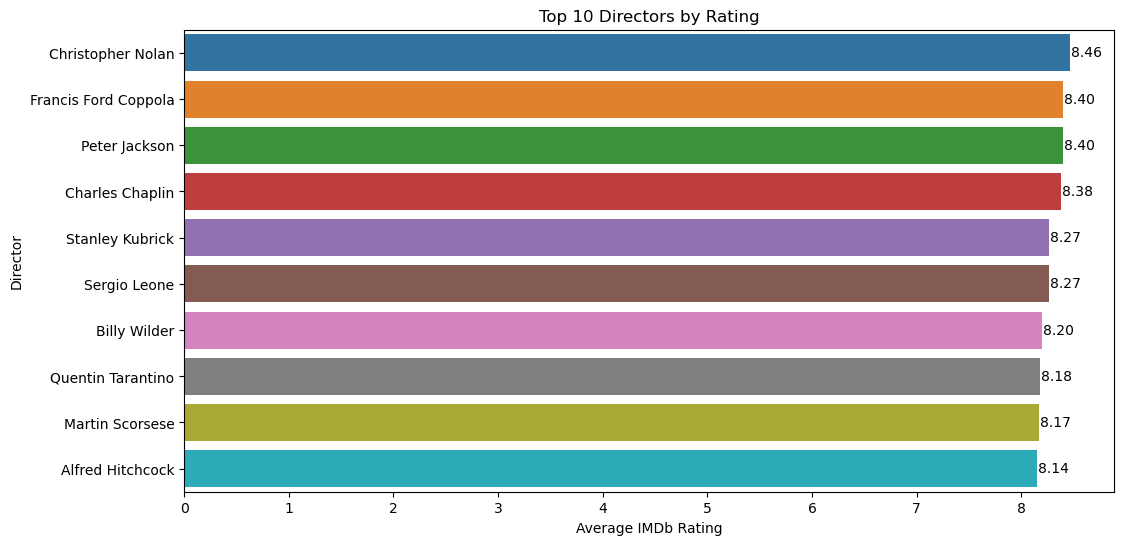

In [66]:
#visualize the top directors

#get only the top 10
top_ten = top_directors.head(10)

#create a bar plot
plt.figure(figsize=(12,6))
barplot = sns.barplot(x=top_ten.values, y=top_ten.index)

#add labels
plt.title('Top 10 Directors by Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')

# Adding text to the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01,
             p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width), 
             ha = 'left',
             va = 'center')
#display
plt.show()

## Do Movie Ratings/Certificates Affect Revenue?

In [67]:
#filter the data to specific ratings we're looking for
filtered_df = df[df['Certificate'].isin(['G','PG','PG-13','R'])]

#get average IMDb rating by each movie certificate rating
avg_rating_by_certificate = filtered_df.groupby('Certificate')['IMDB_Rating'].mean()


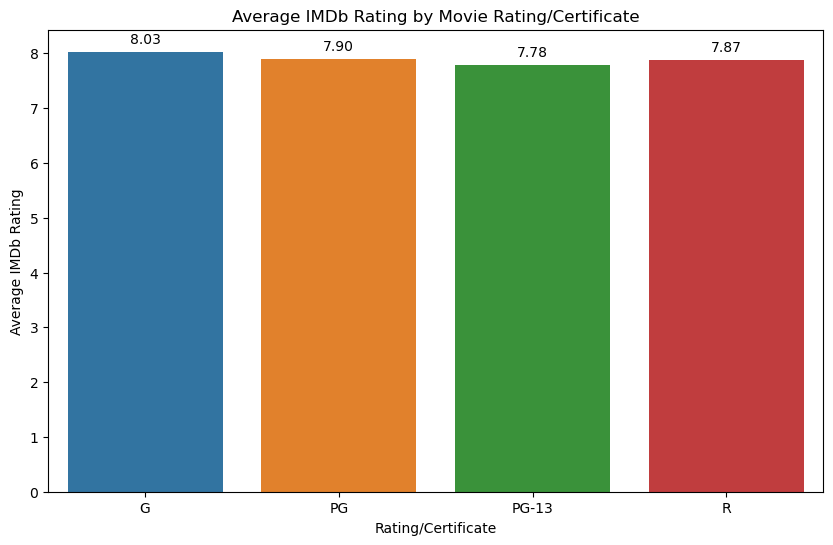

In [68]:
#visualize average IMDb rating by certificate
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=avg_rating_by_certificate.index, y=avg_rating_by_certificate.values)
plt.title('Average IMDb Rating by Movie Rating/Certificate')
plt.xlabel('Rating/Certificate')
plt.ylabel('Average IMDb Rating')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
#display
plt.show()

In [69]:
#get the average gross revenue by each movie certificate
avg_gross = filtered_df.groupby('Certificate')['Gross'].mean()

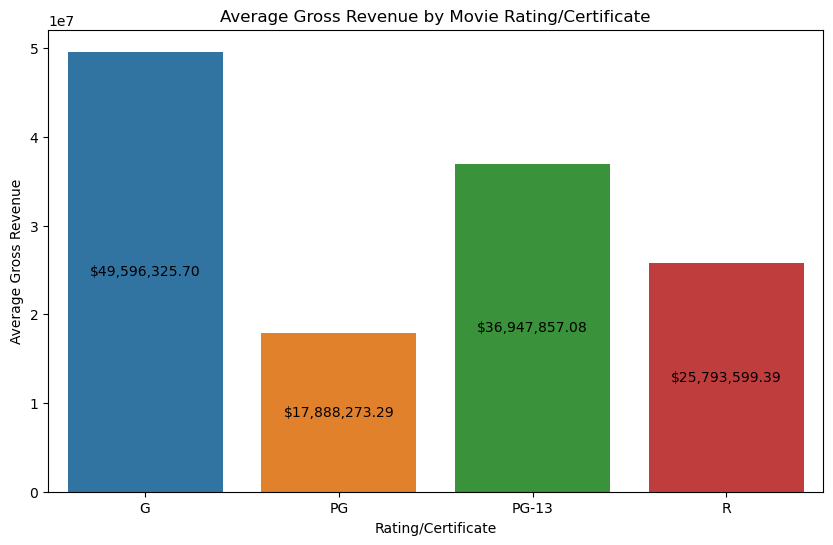

In [76]:
#visualize the average revenue by certificate
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=avg_gross.index, y=avg_gross.values)
plt.title('Average Gross Revenue by Movie Rating/Certificate')
plt.xlabel('Rating/Certificate')
plt.ylabel('Average Gross Revenue')

for p in barplot.patches:
    barplot.annotate('${:,.2f}'.format(p.get_height()),
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                     ha='center', va='center')

plt.show()

## Does Movie Runtime Affect Ratings?

In [78]:
# Ensure 'IMDB_Rating' is a float
df['IMDB_Rating'] = df['IMDB_Rating'].astype(float)

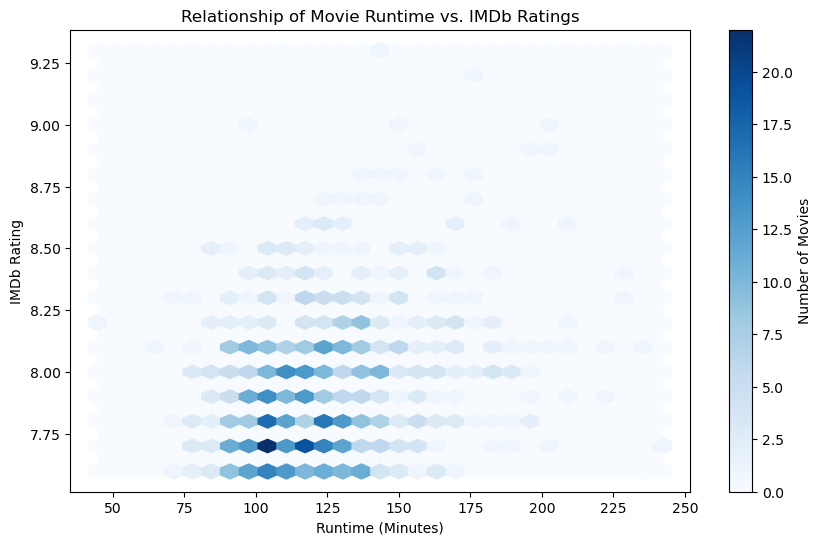

In [82]:
# Creating a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Runtime'], df['IMDB_Rating'], gridsize=30, cmap='Blues')

plt.colorbar(label='Number of Movies')
plt.title('Relationship of Movie Runtime vs. IMDb Ratings')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDb Rating')

plt.show()